In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### IFSC Code:

Every bank branch operating in the country is identified by its own unique IFSC code. 

* The first four characters are alphabets and tell the name of the bank. They remain the same for every bank branch.

* The fifth character is zero.

* The last 6 characters represent the bank branch and they are usually numeric. 

The code is assigned by the Reserve Bank of India. Any transfer system that’s regulated by the RBI will require the use of an IFSC code.

In [2]:
df = pd.read_csv('/home/yaggi/Desktop/dumps/bank_statement_dump.csv')
df

,uuid,application_id,account_number,password,bank,ifsc,file_id,status,reject_reason,statement_from,...,has_password,request_id,id,bank_statement_id,date,details,amount,balance,lender,created_at.1
0,2f446136-16e6-4214-bd4d-5d288712f106,60453,NaN,vemu0407,icici,ICIC0000040,424941,approved,NaN,2019-02-01T05:30:00+05:30,...,True,NaN,0.0,2f446136-16e6-4214-bd4d-5d288712f106,2019-02-01T05:30:00+05:30,VPS/INDRA PETRO/201902011055/903205048181/HYDE...,-100.00,1837.18,NaN,2019-08-15T22:53:47.792737+05:30
1,2f446136-16e6-4214-bd4d-5d288712f106,60453,NaN,vemu0407,icici,ICIC0000040,424941,approved,NaN,2019-02-01T05:30:00+05:30,...,True,NaN,1.0,2f446136-16e6-4214-bd4d-5d288712f106,2019-02-01T05:30:00+05:30,UPI/903211102367/Rapido/peeyushlpu@okhd/HDFC B...,21.00,1858.18,NaN,2019-08-15T22:53:47.792737+05:30
2,2f446136-16e6-4214-bd4d-5d288712f106,60453,NaN,vemu0407,icici,ICIC0000040,424941,approved,NaN,2019-02-01T05:30:00+05:30,...,True,NaN,2.0,2f446136-16e6-4214-bd4d-5d288712f106,2019-02-01T05:30:00+05:30,UPI/903212343016/Payment from Ph/EURONET@ybl/Y...,-9.00,1849.18,NaN,2019-08-15T22:53:47.792737+05:30
3,2f446136-16e6-4214-bd4d-5d288712f106,60453,NaN,vemu0407,icici,ICIC0000040,424941,approved,NaN,2019-02-01T05:30:00+05:30,...,True,NaN,3.0,2f446136-16e6-4214-bd4d-5d288712f106,2019-02-01T05:30:00+05:30,MMT/IMPS/903216530756/FUND TRANSFER/ROPPEN TRA...,636.24,2485.42,NaN,2019-08-15T22:53:47.792737+05:30
4,2f446136-16e6-4214-bd4d-5d288712f106,60453,NaN,vemu0407,icici,ICIC0000040,424941,approved,NaN,2019-02-01T05:30:00+05:30,...,True,NaN,4.0,2f446136-16e6-4214-bd4d-5d288712f106,2019-02-01T05:30:00+05:30,VISA REF MOHSIN MOTOR NEEDS,0.75,2486.17,NaN,2019-08-15T22:53:47.792737+05:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,3f7a3172-103e-4944-a8eb-d3b6675481d7,64338,NaN,kirt1206,icici,ICIC0000552,461226,approved,NaN,2018-12-01T05:30:00+05:30,...,True,NaN,36.0,3f7a3172-103e-4944-a8eb-d3b6675481d7,2018-12-12T05:30:00+05:30,NFS/WDL RVSL/12-12-18/055201548478,10000.00,84881.33,NaN,2019-09-17T10:18:32.409865+05:30
1048571,3f7a3172-103e-4944-a8eb-d3b6675481d7,64338,NaN,kirt1206,icici,ICIC0000552,461226,approved,NaN,2018-12-01T05:30:00+05:30,...,True,NaN,37.0,3f7a3172-103e-4944-a8eb-d3b6675481d7,2018-12-12T05:30:00+05:30,IIN/I-Debit/PayTM /20181212120121,-4800.00,80081.33,NaN,2019-09-17T10:18:32.409865+05:30
1048572,3f7a3172-103e-4944-a8eb-d3b6675481d7,64338,NaN,kirt1206,icici,ICIC0000552,461226,approved,NaN,2018-12-01T05:30:00+05:30,...,True,NaN,38.0,3f7a3172-103e-4944-a8eb-d3b6675481d7,2018-12-12T05:30:00+05:30,NFS/CASH WDL/12-12-18,-6000.00,74081.33,NaN,2019-09-17T10:18:32.409865+05:30
1048573,3f7a3172-103e-4944-a8eb-d3b6675481d7,64338,NaN,kirt1206,icici,ICIC0000552,461226,approved,NaN,2018-12-01T05:30:00+05:30,...,True,NaN,39.0,3f7a3172-103e-4944-a8eb-d3b6675481d7,2018-12-13T05:30:00+05:30,MIN/Rentomojo /20181213002602/1,-1450.00,72631.33,NaN,2019-09-17T10:18:32.409865+05:30


In [3]:
df.columns

Index(['uuid', 'application_id', 'account_number', 'password', 'bank', 'ifsc',
       'file_id', 'status', 'reject_reason', 'statement_from', 'statement_to',
       'password_hint', 'score', 'created_at', 'has_password', 'request_id',
       'id', 'bank_statement_id', 'date', 'details', 'amount', 'balance',
       'lender', 'created_at.1'],
      dtype='object')

In [4]:
df.status.value_counts()

approved    954476
pending      94099
Name: status, dtype: int64

In [5]:
df.reject_reason.value_counts()

insufficient_max_limit    2986
corrupt_file              1769
parse_save_failed          357
password_unknown            52
Name: reject_reason, dtype: int64

In [6]:
df.lender.value_counts() #-> lender Exists Feat Engg.

Camden town technologies               2544
Finnovation Tech Solutions Pvt. Ltd    2520
IVL Finance                            1429
Bajaj Finance                           894
KrazeyBee                               827
Ashish Securities                       724
Personal Loan - Unknown Lender          699
Home Credit                             642
ICICI Bank                              536
SmartCoin                               532
Bhanix Finance                          429
Akara Capital                           427
PaySense                                396
E-Pay later                             355
DMI Finance                             311
Vivifi Tech                             304
Sunidhi Capital                         237
HDFC Bank                               173
IIFL                                    152
flashcash                               113
Mannapuram finance                      108
Other Loan                               89
TATA Capital                    

In [7]:
df.isnull().sum()

uuid                       0
application_id             0
account_number        590544
password              143331
bank                       2
ifsc                  268783
file_id                    0
status                     0
reject_reason        1043411
statement_from         94101
statement_to           94101
password_hint        1035299
score                  94101
created_at                 0
has_password               0
request_id            804890
id                    109831
bank_statement_id     109831
date                  109831
details               109831
amount                109831
balance               109831
lender               1033679
created_at.1          109831
dtype: int64

In [8]:
df.drop(['uuid', 'account_number', 'password', 'status', 'reject_reason',
         'password_hint', 'score', 'created_at', 'has_password', 'request_id',
         'id', 'bank_statement_id', 'created_at.1'],axis=1,inplace=True)

In [9]:
df.columns = ['App_ID','Bank','IFSC','File_ID','Statement_Start','Statement_End','Transaction_Date','Transaction_Details','Amount','Balance','Lender']
df

,App_ID,Bank,IFSC,File_ID,Statement_Start,Statement_End,Transaction_Date,Transaction_Details,Amount,Balance,Lender
0,60453,icici,ICIC0000040,424941,2019-02-01T05:30:00+05:30,2019-02-28T05:30:00+05:30,2019-02-01T05:30:00+05:30,VPS/INDRA PETRO/201902011055/903205048181/HYDE...,-100.00,1837.18,NaN
1,60453,icici,ICIC0000040,424941,2019-02-01T05:30:00+05:30,2019-02-28T05:30:00+05:30,2019-02-01T05:30:00+05:30,UPI/903211102367/Rapido/peeyushlpu@okhd/HDFC B...,21.00,1858.18,NaN
2,60453,icici,ICIC0000040,424941,2019-02-01T05:30:00+05:30,2019-02-28T05:30:00+05:30,2019-02-01T05:30:00+05:30,UPI/903212343016/Payment from Ph/EURONET@ybl/Y...,-9.00,1849.18,NaN
3,60453,icici,ICIC0000040,424941,2019-02-01T05:30:00+05:30,2019-02-28T05:30:00+05:30,2019-02-01T05:30:00+05:30,MMT/IMPS/903216530756/FUND TRANSFER/ROPPEN TRA...,636.24,2485.42,NaN
4,60453,icici,ICIC0000040,424941,2019-02-01T05:30:00+05:30,2019-02-28T05:30:00+05:30,2019-02-01T05:30:00+05:30,VISA REF MOHSIN MOTOR NEEDS,0.75,2486.17,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1048570,64338,icici,ICIC0000552,461226,2018-12-01T05:30:00+05:30,2018-12-31T05:30:00+05:30,2018-12-12T05:30:00+05:30,NFS/WDL RVSL/12-12-18/055201548478,10000.00,84881.33,NaN
1048571,64338,icici,ICIC0000552,461226,2018-12-01T05:30:00+05:30,2018-12-31T05:30:00+05:30,2018-12-12T05:30:00+05:30,IIN/I-Debit/PayTM /20181212120121,-4800.00,80081.33,NaN
1048572,64338,icici,ICIC0000552,461226,2018-12-01T05:30:00+05:30,2018-12-31T05:30:00+05:30,2018-12-12T05:30:00+05:30,NFS/CASH WDL/12-12-18,-6000.00,74081.33,NaN
1048573,64338,icici,ICIC0000552,461226,2018-12-01T05:30:00+05:30,2018-12-31T05:30:00+05:30,2018-12-13T05:30:00+05:30,MIN/Rentomojo /20181213002602/1,-1450.00,72631.33,NaN


In [10]:
df.Statement_Start = df.Statement_Start.apply(lambda x:str(x).split('T')[0])
df.Statement_End = df.Statement_End.apply(lambda x:str(x).split('T')[0])
df.Transaction_Date = df.Transaction_Date.apply(lambda x:str(x).split('T')[0])

App_ID                       0
Bank                         2
IFSC                    268783
File_ID                      0
Statement_Start          94101
Statement_End            94101
Transaction_Date        109831
Transaction_Details     109831
Amount                  109831
Balance                 109831
Lender                 1033679
dtype: int64


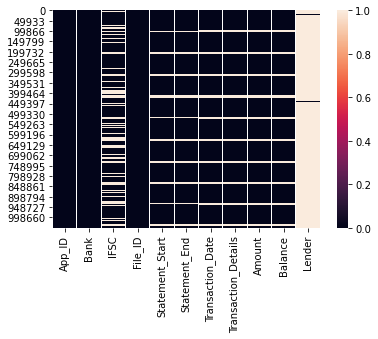

App_ID                      0
Bank                        0
IFSC                   165467
File_ID                     0
Statement_Start            27
Statement_End              27
Transaction_Date            0
Transaction_Details         0
Amount                      0
Balance                     0
Lender                 923848
dtype: int64


In [11]:
df.Transaction_Date.replace('nan',np.nan,inplace=True)
df.Statement_End.replace('nan',np.nan,inplace=True)
df.Statement_Start.replace('nan',np.nan,inplace=True)

print(df.isnull().sum())

sns.heatmap(df.isnull())
plt.show()

df = df[~df.Transaction_Date.isnull()]

print(df.isnull().sum())

In [12]:
df = df[~df.Statement_End.isnull()]

#### Handling the Dates!

In [13]:
# df.Transaction_Date.apply(lambda x:len(str(x).split('-')[0])).value_counts()

df['Transaction_Year'] = df.Transaction_Date.apply(lambda x:str(x).split('-')[0])
df.Transaction_Year.value_counts()

df = df[df['Transaction_Year'].isin(['2019','2018','2020'])]

df.Transaction_Date = pd.to_datetime(df.Transaction_Date)
df.Statement_End = pd.to_datetime(df.Statement_End)
df.Statement_Start = pd.to_datetime(df.Statement_Start)

df.drop('Transaction_Year',axis=1,inplace=True)

In [14]:
df.isnull().sum()

App_ID                      0
Bank                        0
IFSC                   165393
File_ID                     0
Statement_Start             0
Statement_End               0
Transaction_Date            0
Transaction_Details         0
Amount                      0
Balance                     0
Lender                 923755
dtype: int64

#### Considering 6Months Statement

In [15]:
statements = df.groupby(['App_ID','Bank','IFSC'])['File_ID'].count().reset_index()
statements[statements.File_ID>=6].shape,statements.shape

((4533, 4), (5837, 4))

In [16]:
statements = statements[statements.File_ID>=6]
statements

,App_ID,Bank,IFSC,File_ID
0,58560,icici,ICIC0001577,291
1,58560,kotak,KKBK0005197,194
2,58563,axis,UTIB0000733,38
5,58576,axis,UTIB0001276,236
6,58582,hdfc,HDFC0000816,504
...,...,...,...,...
5832,121848,kotak,KKBK0001782,239
5833,121874,hdfc,HDFC0000236,136
5834,121881,kotak,KKBK0007801,80
5835,121895,kotak,KKBK0008070,140


In [17]:
statements = statements[['App_ID','Bank','IFSC']]
df = pd.merge(df,statements)
df

,App_ID,Bank,IFSC,File_ID,Statement_Start,Statement_End,Transaction_Date,Transaction_Details,Amount,Balance,Lender
0,60453,icici,ICIC0000040,424941,2019-02-01,2019-02-28,2019-02-01,VPS/INDRA PETRO/201902011055/903205048181/HYDE...,-100.00,1837.18,NaN
1,60453,icici,ICIC0000040,424941,2019-02-01,2019-02-28,2019-02-01,UPI/903211102367/Rapido/peeyushlpu@okhd/HDFC B...,21.00,1858.18,NaN
2,60453,icici,ICIC0000040,424941,2019-02-01,2019-02-28,2019-02-01,UPI/903212343016/Payment from Ph/EURONET@ybl/Y...,-9.00,1849.18,NaN
3,60453,icici,ICIC0000040,424941,2019-02-01,2019-02-28,2019-02-01,MMT/IMPS/903216530756/FUND TRANSFER/ROPPEN TRA...,636.24,2485.42,NaN
4,60453,icici,ICIC0000040,424941,2019-02-01,2019-02-28,2019-02-01,VISA REF MOHSIN MOTOR NEEDS,0.75,2486.17,NaN
...,...,...,...,...,...,...,...,...,...,...,...
769685,62720,hdfc,HDFC0000103,447729,2019-08-01,2019-08-31,2019-08-26,UPI-DNYANESHWAR JANARDHA-BARBAILED@OKAXIS-UBIN...,3000.00,3579.40,NaN
769686,62720,hdfc,HDFC0000103,447729,2019-08-01,2019-08-31,2019-08-27,IMPS-923907312626--UBIN-XXXXXXXXXXX7370-TRF,-3000.00,579.40,NaN
769687,62720,hdfc,HDFC0000103,447729,2019-08-01,2019-08-31,2019-08-28,.IMPS P2P 923813378044#26/08/2019 260819-MIR19...,-5.90,573.50,NaN
769688,62720,hdfc,HDFC0000103,447729,2019-08-01,2019-08-31,2019-08-29,.IMPS P2P 923907312626#27/08/2019 270819-MIR19...,-5.90,567.60,NaN


In [18]:
df.columns

Index(['App_ID', 'Bank', 'IFSC', 'File_ID', 'Statement_Start', 'Statement_End',
       'Transaction_Date', 'Transaction_Details', 'Amount', 'Balance',
       'Lender'],
      dtype='object')

In [19]:
df[df.App_ID==117570][['Bank','File_ID','IFSC','Statement_Start','Statement_End']].drop_duplicates()

,Bank,File_ID,IFSC,Statement_Start,Statement_End
310730,kotak,930134,KKBK0003650,2019-09-01,2019-09-30
310746,kotak,930135,KKBK0003650,2019-05-01,2019-05-31
310747,kotak,930137,KKBK0003650,2020-03-01,2020-03-31
310783,kotak,930143,KKBK0003650,2020-04-01,2020-04-30
310811,kotak,930129,KKBK0003650,2020-02-01,2020-02-29
310840,kotak,930145,KKBK0003650,2019-12-01,2019-12-31
310872,kotak,930148,KKBK0003650,2020-05-01,2020-05-31
524057,kotak,930131,KKBK0003649,2019-09-01,2019-09-30
524068,kotak,930133,KKBK0003649,2019-10-01,2019-10-31
524069,kotak,930140,KKBK0003649,2019-11-01,2019-11-30


In [20]:
statements_6m = df[['App_ID', 'Bank', 'IFSC', 'File_ID', 'Statement_Start', 'Statement_End']].drop_duplicates().sort_values('Statement_End').groupby(['App_ID','Bank','IFSC']).tail(6)
statements_6m

,App_ID,Bank,IFSC,File_ID,Statement_Start,Statement_End
110572,75481,kotak,KKBK0000322,603165,2018-02-01,2018-02-28
110560,75481,kotak,KKBK0000322,603167,2018-04-01,2018-04-30
110585,75481,kotak,KKBK0000322,603156,2018-05-01,2018-05-31
527600,58560,kotak,KKBK0005197,408136,2018-06-01,2018-06-30
491436,96415,kotak,KKBK0003540,851268,2018-07-01,2018-07-31
...,...,...,...,...,...,...
623870,116160,kotak,KKBK0007477,946270,2020-05-01,2020-05-31
624323,118889,axis,UTIB0001616,948189,2020-05-01,2020-05-31
624589,117097,rbl,RATN0000260,949585,2020-05-01,2020-05-31
686624,118776,kotak,KKBK0000493,936057,2020-05-01,2020-05-31


In [21]:
print(df.shape)
df = pd.merge(df,statements_6m)
df.shape

(769690, 11)


(700128, 11)

In [22]:
df.sort_values(['App_ID','Bank', 'IFSC','Statement_End'],ascending=False)

,App_ID,Bank,IFSC,File_ID,Statement_Start,Statement_End,Transaction_Date,Transaction_Details,Amount,Balance,Lender
467539,122064,kotak,KKBK0002860,949218,2020-04-01,2020-04-30,2020-04-01,OPENINGBALANCE...,35.17,35.17,NaN
467540,122064,kotak,KKBK0002860,949218,2020-04-01,2020-04-30,2020-04-23,Chrg:AQBNonMaintenanceforQuarterendMar-2020,-5.67,29.50,NaN
467541,122064,kotak,KKBK0002860,949218,2020-04-01,2020-04-30,2020-04-29,RemChrgs:POSDECLFEE/xx3368/001908299332/190120...,-29.50,0.00,NaN
467542,122064,kotak,KKBK0002860,949224,2020-03-01,2020-03-31,2020-03-04,MB:RECEIVEDFROM2412511518,9500.00,9500.00,NaN
467543,122064,kotak,KKBK0002860,949224,2020-03-01,2020-03-31,2020-03-04,UPI/nainesh.pat/006412158207/pay,-9500.00,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...
287180,58560,icici,ICIC0001577,408122,2018-09-01,2018-09-30,2018-09-26,BIL/001542226405/NA/NSP157701519097/PRERNA DAS,5000.00,5000.87,NaN
287181,58560,icici,ICIC0001577,408122,2018-09-01,2018-09-30,2018-09-26,UPI/826930895562/Payment from Ph/7275739485@yb...,4000.00,9000.87,NaN
287182,58560,icici,ICIC0001577,408122,2018-09-01,2018-09-30,2018-09-26,IPS/INSTAKART S/20180926153318/0,-8990.00,10.87,NaN
287183,58560,icici,ICIC0001577,408122,2018-09-01,2018-09-30,2018-09-27,UPI/827045061725/Payment from Ph/7275739485@yb...,-10.00,0.87,NaN


In [23]:
df

,App_ID,Bank,IFSC,File_ID,Statement_Start,Statement_End,Transaction_Date,Transaction_Details,Amount,Balance,Lender
0,60453,icici,ICIC0000040,424941,2019-02-01,2019-02-28,2019-02-01,VPS/INDRA PETRO/201902011055/903205048181/HYDE...,-100.00,1837.18,NaN
1,60453,icici,ICIC0000040,424941,2019-02-01,2019-02-28,2019-02-01,UPI/903211102367/Rapido/peeyushlpu@okhd/HDFC B...,21.00,1858.18,NaN
2,60453,icici,ICIC0000040,424941,2019-02-01,2019-02-28,2019-02-01,UPI/903212343016/Payment from Ph/EURONET@ybl/Y...,-9.00,1849.18,NaN
3,60453,icici,ICIC0000040,424941,2019-02-01,2019-02-28,2019-02-01,MMT/IMPS/903216530756/FUND TRANSFER/ROPPEN TRA...,636.24,2485.42,NaN
4,60453,icici,ICIC0000040,424941,2019-02-01,2019-02-28,2019-02-01,VISA REF MOHSIN MOTOR NEEDS,0.75,2486.17,NaN
...,...,...,...,...,...,...,...,...,...,...,...
700123,62720,hdfc,HDFC0000103,447729,2019-08-01,2019-08-31,2019-08-26,UPI-DNYANESHWAR JANARDHA-BARBAILED@OKAXIS-UBIN...,3000.00,3579.40,NaN
700124,62720,hdfc,HDFC0000103,447729,2019-08-01,2019-08-31,2019-08-27,IMPS-923907312626--UBIN-XXXXXXXXXXX7370-TRF,-3000.00,579.40,NaN
700125,62720,hdfc,HDFC0000103,447729,2019-08-01,2019-08-31,2019-08-28,.IMPS P2P 923813378044#26/08/2019 260819-MIR19...,-5.90,573.50,NaN
700126,62720,hdfc,HDFC0000103,447729,2019-08-01,2019-08-31,2019-08-29,.IMPS P2P 923907312626#27/08/2019 270819-MIR19...,-5.90,567.60,NaN


In [24]:
df.isnull().sum()

App_ID                      0
Bank                        0
IFSC                        0
File_ID                     0
Statement_Start             0
Statement_End               0
Transaction_Date            0
Transaction_Details         0
Amount                      0
Balance                     0
Lender                 687869
dtype: int64

In [25]:
## Static Lenders, last updated in 2019 --> Ignore!

df.drop('Lender',axis=1,inplace=True)

In [26]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub(r'[0-9]','',text) #Removing Numbers
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
#     text = re.sub('\w*\d\w*', '', text) #text with numbers in it to be removed!
    text = re.sub(' +', ' ', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [27]:
df.Transaction_Details

0         VPS/INDRA PETRO/201902011055/903205048181/HYDE...
1         UPI/903211102367/Rapido/peeyushlpu@okhd/HDFC B...
2         UPI/903212343016/Payment from Ph/EURONET@ybl/Y...
3         MMT/IMPS/903216530756/FUND TRANSFER/ROPPEN TRA...
4                               VISA REF MOHSIN MOTOR NEEDS
                                ...                        
700123    UPI-DNYANESHWAR JANARDHA-BARBAILED@OKAXIS-UBIN...
700124          IMPS-923907312626--UBIN-XXXXXXXXXXX7370-TRF
700125    .IMPS P2P 923813378044#26/08/2019 260819-MIR19...
700126    .IMPS P2P 923907312626#27/08/2019 270819-MIR19...
700127          IMPS-924214391372--UBIN-XXXXXXXXXXX7370-TRF
Name: Transaction_Details, Length: 700128, dtype: object

In [28]:
df.Transaction_Details[3]

'MMT/IMPS/903216530756/FUND TRANSFER/ROPPEN TRA/YES BANK LTD'

In [29]:
df['New_Transaction_Details'] = df.Transaction_Details.apply(round1)
df['New_Transaction_Details']

0                                 vps indra petro hyderabad
1                   upi rapido peeyushlpu okhd hdfc bankltd
2             upi payment from ph euronet ybl yes bank ltd 
3            mmt imps fund transfer roppen tra yes bank ltd
4                               visa ref mohsin motor needs
                                ...                        
700123    upi dnyaneshwar janardha barbailed okaxis ubin...
700124                            imps ubin xxxxxxxxxxx trf
700125                                          imps pp mir
700126                                          imps pp mir
700127                            imps ubin xxxxxxxxxxx trf
Name: New_Transaction_Details, Length: 700128, dtype: object

In [30]:
import pandas as pd
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")
df['New_Transaction_Details'] = df['New_Transaction_Details'].apply(lambda x: [stemmer.stem(y) for y in x.split()]) # Stem every word.

In [31]:
vocab = df.explode('New_Transaction_Details')['New_Transaction_Details'].value_counts()
vocab
# df.New_Transaction_Details

upi                                   370196
xxxxxx                                 72133
imp                                    65647
pos                                    61474
payment                                59911
                                       ...  
jainendra                                  1
nepaligupta                                1
cashwithdrawalselfatameerpetbranch         1
doshimitansh                               1
sbiebebffc                                 1
Name: New_Transaction_Details, Length: 95686, dtype: int64

In [32]:
# vocab[vocab>1000].to_csv('keywords_gathered.csv')

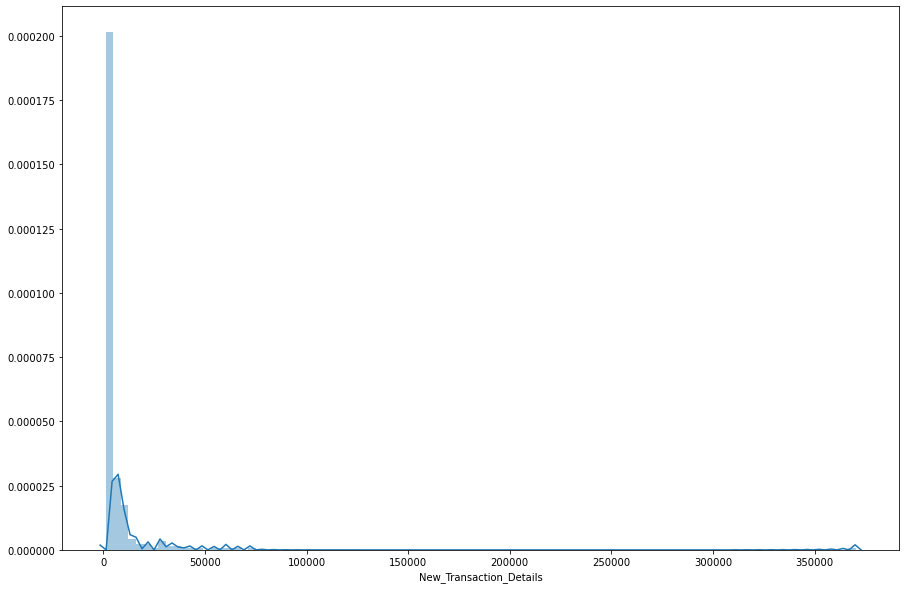

In [33]:
# import plotly.express as px

# fig = px.bar(vocab)#, x='Vocabulary', y='Counts')
# fig.show()
plt.figure(figsize=(15,10))
sns.distplot(vocab[vocab>1000],bins=100);

    -- Need to operate on vocab!

### Week Number & Weekend from Transaction Date!

In [34]:
def week_number(X):
    if X<=7:
        return 1
    elif X<=14:
        return 2
    elif X<=21:
        return 3
    else:
        return 4

df['Week_Number'] = df.Transaction_Date.dt.day.apply(week_number)

In [35]:
def weekend(X):
    if X in ['Friday','Saturday','Sunday']:
        return 'Weekend'
    else:
        return 'Weekday'
df['Weekend'] = df.Transaction_Date.dt.day_name().apply(weekend)

## Handling Anomalies based on Date!

In [36]:
anomaly_1 = df[df.Transaction_Date<df.Statement_Start]
anomaly_2 = df[df.Transaction_Date>df.Statement_End]

In [37]:
anomalies = pd.concat([anomaly_1,anomaly_2])
anomalies

,App_ID,Bank,IFSC,File_ID,Statement_Start,Statement_End,Transaction_Date,Transaction_Details,Amount,Balance,New_Transaction_Details,Week_Number,Weekend
6345,61242,hdfc,HDFC0004216,432975,2018-12-29,2019-01-28,2018-12-28,UPI-50200027864076-BOOKMYSHOW.RZP@HDFCBANK-PAY...,-398.2,5385.79,"[upi, bookmyshow, rzp, hdfcbank, pay, bigtreee...",4,Weekend
6427,61242,hdfc,HDFC0004216,432973,2019-06-29,2019-07-28,2019-06-28,UPI-K K D PAN SHOP-PAYTMQR281005050101PZHUMOOK...,-32.0,148752.62,"[upi, k, k, d, pan, shop, paytmqrpzhumookg, pa...",4,Weekend
8564,61661,hdfc,HDFC0004299,437338,2019-04-27,2019-05-26,2019-04-26,POS 512967XXXXXX8027 SRI SAI FOODS POS DEBIT,-40.0,4314.01,"[pos, xxxxxx, sri, sai, food, pos, debit]",4,Weekend
15845,62255,hdfc,HDFC0000362,442919,2019-06-01,2019-06-30,2019-05-31,ATW-405988XXXXXX7596-S1ACJS04-SUNDARGARHValue ...,-200.0,15259.53,"[atw, xxxxxx, sacj, sundargarhvalu, dt, ref]",4,Weekend
19337,62466,hdfc,HDFC0002770,445521,2019-02-25,2019-03-24,2019-02-24,NWD-416021XXXXXX0134-C0118205-TIRUVANNAMALA,-600.0,6.57,"[nwd, xxxxxx, c, tiruvannamala]",4,Weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...
645018,101848,hdfc,HDFC0000861,851680,2019-04-12,2019-05-11,2019-05-12,50400091451631- RD INSTALLMENT-MAY 2019,-1000.0,13575.75,"[rd, instal, may]",2,Weekend
645056,101848,hdfc,HDFC0000861,851691,2019-02-12,2019-03-11,2019-03-12,50400091451631- RD INSTALLMENT-MAR 2019STATEME...,-1000.0,27799.33,"[rd, instal, mar, statement, summari]",2,Weekday
658722,74854,hdfc,HDFC0000261,591567,2019-01-02,2019-02-01,2019-02-02,50400133052379- RD INSTALLMENT-FEB 2019,-10000.0,625.46,"[rd, instal, feb]",1,Weekend
693169,70943,hdfc,HDFC0003477,542717,2019-08-11,2019-09-10,2019-09-11,50400152490371- RD INSTALLMENT-SEP 2019,-1000.0,9000.00,"[rd, instal, sep]",2,Weekday


In [38]:
temp = anomalies.groupby('App_ID')['Amount'].apply(lambda x: pd.Series([(x < 0).sum(),(x > 0).sum()])).unstack().reset_index()
temp.columns = ['App_ID','Debit_Anomalies','Credit_Anomalies']
df = pd.merge(df,temp,how='left')

print(df.isnull().sum())

df.Debit_Anomalies.fillna(0,inplace=True)
df.Credit_Anomalies.fillna(0,inplace=True)

App_ID                          0
Bank                            0
IFSC                            0
File_ID                         0
Statement_Start                 0
Statement_End                   0
Transaction_Date                0
Transaction_Details             0
Amount                          0
Balance                         0
New_Transaction_Details         0
Week_Number                     0
Weekend                         0
Debit_Anomalies            616546
Credit_Anomalies           616546
dtype: int64


In [39]:
df.groupby(['App_ID','Bank'])['File_ID'].count()

App_ID  Bank 
58560   icici    291
        kotak    194
58563   axis      38
58576   axis     236
58582   hdfc     385
                ... 
121848  kotak    239
121874  hdfc     136
121881  kotak     80
121895  kotak    140
122064  kotak     75
Name: File_ID, Length: 4360, dtype: int64

## Debits, Credits, Debit Credit Ratio(Nos and Amts), Total Transactions

In [40]:
df.isnull().sum()

App_ID                     0
Bank                       0
IFSC                       0
File_ID                    0
Statement_Start            0
Statement_End              0
Transaction_Date           0
Transaction_Details        0
Amount                     0
Balance                    0
New_Transaction_Details    0
Week_Number                0
Weekend                    0
Debit_Anomalies            0
Credit_Anomalies           0
dtype: int64

In [41]:
df['nBanks'] = df.App_ID.map(df.groupby('App_ID')['Bank'].nunique())

In [42]:
df['nAccounts'] = df.App_ID.map(df.groupby('App_ID')['IFSC'].nunique())

In [43]:
df[df.Amount>0].shape

(249532, 17)

In [44]:
# Overall Counts
debt_cred = df.groupby('App_ID')['Amount'].apply(lambda x: pd.Series([(x < 0).sum(),(x > 0).sum()])).unstack().reset_index()
debt_cred.columns = ['App_ID','Overall_Debits','Overall_Credits']
df = pd.merge(df,debt_cred)

# Overall Amounts
debit_amount = df[df['Amount']<0].groupby('App_ID')[['Amount']].agg([np.sum,np.max,np.min,np.median,np.mean]).transform(lambda x:abs(x)).reset_index()
debit_amount.columns = ['App_ID','Overall_Debit_Amount_Sum','Overall_Debit_Amount_Max','Overall_Debit_Amount_Min','Overall_Debit_Amount_Median','Overall_Debit_Amount_Mean']
credit_amount = df[df['Amount']>0].groupby('App_ID')[['Amount']].agg([np.sum,np.max,np.min,np.median,np.mean]).transform(lambda x:abs(x)).reset_index()
credit_amount.columns = ['App_ID','Overall_Credit_Amount_Sum','Overall_Credit_Amount_Max','Overall_Credit_Amount_Min','Overall_Credit_Amount_Median','Overall_Credit_Amount_Mean']
df = pd.merge(df,debit_amount,how='left')
df = pd.merge(df,credit_amount,how='left')
df.isnull().sum()

App_ID                             0
Bank                               0
IFSC                               0
File_ID                            0
Statement_Start                    0
Statement_End                      0
Transaction_Date                   0
Transaction_Details                0
Amount                             0
Balance                            0
New_Transaction_Details            0
Week_Number                        0
Weekend                            0
Debit_Anomalies                    0
Credit_Anomalies                   0
nBanks                             0
nAccounts                          0
Overall_Debits                     0
Overall_Credits                    0
Overall_Debit_Amount_Sum        1728
Overall_Debit_Amount_Max        1728
Overall_Debit_Amount_Min        1728
Overall_Debit_Amount_Median     1728
Overall_Debit_Amount_Mean       1728
Overall_Credit_Amount_Sum        385
Overall_Credit_Amount_Max        385
Overall_Credit_Amount_Min        385
O

In [45]:
df.fillna(0,inplace=True)

In [46]:
df.Bank.value_counts()

kotak       250535
hdfc        239915
icici        92625
axis         78234
rbl          12447
bob           7576
sbi           7007
dena          6992
dcb           1515
indusind      1503
ubi           1255
yes            484
corp            40
Name: Bank, dtype: int64

### Account Wise Debits and Credits & Amounts

    --- Account Level

In [47]:
temp = df.groupby(['App_ID','IFSC'])['Amount'].apply(lambda x: pd.Series([(x < 0).sum(),(x > 0).sum()])).unstack().reset_index()
temp.rename(columns = {0:'Debits',1:'Credits'},inplace=True)
temp = temp.groupby(['App_ID']).agg({'Debits':[np.median,np.mean],'Credits':[np.median,np.mean]}).reset_index()
temp.columns = ['App_ID','nDebitsMedian_Accwise','nDebitsMean_Accwise','nCreditsMedian_Accwise','nCreditsMean_Accwise']
df = pd.merge(df,temp,how='left')
df.isnull().sum()

acc_debit_amount = df[df['Amount']<0].groupby(['App_ID','IFSC'])[['Amount']].agg([np.sum,np.max,np.min,np.median,np.mean]).transform(lambda x:abs(x)).reset_index()
acc_debit_amount.columns = ['App_ID','IFSC','SUM','MAX','MIN','MEDIAN','MEAN']
acc_debit_amount = acc_debit_amount.groupby('App_ID').agg({'SUM':np.sum,
                                                            'MAX':np.max,
                                                            'MIN':np.min,
                                                            'MEDIAN':np.median,
                                                            'MEAN':np.mean}).reset_index()
acc_debit_amount.columns = ['App_ID','DebitAmount_Sum_Accwise','DebitAmount_Max_Accwise','DebitAmount_Min_Accwise','DebitAmount_Median_Accwise','DebitAmount_Mean_Accwise']
df = pd.merge(df,acc_debit_amount,how='left')

acc_credit_amount = df[df['Amount']>0].groupby(['App_ID','IFSC'])[['Amount']].agg([np.sum,np.max,np.min,np.median,np.mean]).transform(lambda x:abs(x)).reset_index()
acc_credit_amount.columns = ['App_ID','IFSC','SUM','MAX','MIN','MEDIAN','MEAN']
acc_credit_amount = acc_credit_amount.groupby('App_ID').agg({'SUM':np.sum,
                                                            'MAX':np.max,
                                                            'MIN':np.min,
                                                            'MEDIAN':np.median,
                                                            'MEAN':np.mean}).reset_index()
acc_credit_amount.columns = ['App_ID','CreditAmount_Sum_Accwise','CreditAmount_Max_Accwise','CreditAmount_Min_Accwise','CreditAmount_Median_Accwise','CreditAmount_Mean_Accwise']
df = pd.merge(df,acc_credit_amount,how='left')
df.isnull().sum()

App_ID                             0
Bank                               0
IFSC                               0
File_ID                            0
Statement_Start                    0
Statement_End                      0
Transaction_Date                   0
Transaction_Details                0
Amount                             0
Balance                            0
New_Transaction_Details            0
Week_Number                        0
Weekend                            0
Debit_Anomalies                    0
Credit_Anomalies                   0
nBanks                             0
nAccounts                          0
Overall_Debits                     0
Overall_Credits                    0
Overall_Debit_Amount_Sum           0
Overall_Debit_Amount_Max           0
Overall_Debit_Amount_Min           0
Overall_Debit_Amount_Median        0
Overall_Debit_Amount_Mean          0
Overall_Credit_Amount_Sum          0
Overall_Credit_Amount_Max          0
Overall_Credit_Amount_Min          0
O

In [48]:
df.fillna(0,inplace=True)

### Bank Wise Debits and Credits & Amounts

    -- Bank Account Statement Level

In [49]:
# Counts
temp = df.groupby(['App_ID','Bank','IFSC','Statement_Start'])['Amount'].apply(lambda x: pd.Series([(x < 0).sum(),(x > 0).sum()])).unstack().reset_index()
temp.rename(columns = {0:'Debits',1:'Credits'},inplace=True)
temp = temp.groupby(['App_ID','Bank','IFSC']).agg({'Debits':[np.median,np.mean],'Credits':[np.median,np.mean]}).reset_index()
temp.columns = ['App_ID','Bank','IFSC','nDebitsMedian','nDebitsMean','nCreditsMedian','nCreditsMean']
temp = temp.groupby(['App_ID','Bank']).agg({'nDebitsMedian' : np.median,
                                     'nDebitsMean' : np.mean,
                                     'nCreditsMedian' : np.median,
                                     'nCreditsMean' : np.mean}).reset_index()
temp = temp.groupby('App_ID').agg({'nDebitsMedian' : np.median,
                                     'nDebitsMean' : np.mean,
                                     'nCreditsMedian' : np.median,
                                     'nCreditsMean' : np.mean}).reset_index()
temp.columns = ['App_ID','nDebits_Median_BankAccStatementWise','nDebits_Mean_BankAccStatementWise','nCredits_Median_BankAccStatementWise','nCredits_Mean_BankAccStatementWise']
df = pd.merge(df,temp,how='left')

# Amounts
    #Debit Amount
bankacc_statement_debit_amount = df[df['Amount']<0].groupby(['App_ID','Bank','IFSC','Statement_Start'])['Amount'].agg([np.sum,np.max,np.min,np.median,np.mean]).transform(lambda x:abs(x)).reset_index()
bankacc_statement_debit_amount = bankacc_statement_debit_amount.groupby(['App_ID','Bank','IFSC']).agg({'sum':np.sum,
                                                                                                       'amax':np.max,
                                                                                                       'amin':np.min,
                                                                                                       'median':np.median,
                                                                                                       'mean':np.mean}).reset_index()
bankacc_statement_debit_amount = bankacc_statement_debit_amount.groupby(['App_ID','Bank']).agg({'sum':np.sum,
                                                                                                       'amax':np.max,
                                                                                                       'amin':np.min,
                                                                                                       'median':np.median,
                                                                                                       'mean':np.mean}).reset_index()
bankacc_statement_debit_amount = bankacc_statement_debit_amount.groupby('App_ID').agg({'sum':np.sum,
                                                                                                       'amax':np.max,
                                                                                                       'amin':np.min,
                                                                                                       'median':np.median,
                                                                                                       'mean':np.mean}).reset_index()
bankacc_statement_debit_amount.columns = ['App_ID','DebitAmount_Sum_BankAccStatementwise','DebitAmount_Max_BankAccStatementwise','DebitAmount_Min_BankAccStatementwise','DebitAmount_Median_BankAccStatementwise','DebitAmount_Mean_BankAccStatementwise']
df = pd.merge(df,bankacc_statement_debit_amount,how='left')

    #Credit Amount
bankacc_statement_credit_amount = df[df['Amount']>0].groupby(['App_ID','Bank','IFSC','Statement_Start'])['Amount'].agg([np.sum,np.max,np.min,np.median,np.mean]).transform(lambda x:abs(x)).reset_index()
bankacc_statement_credit_amount = bankacc_statement_credit_amount.groupby(['App_ID','Bank','IFSC']).agg({'sum':np.sum,
                                                                                                       'amax':np.max,
                                                                                                       'amin':np.min,
                                                                                                       'median':np.median,
                                                                                                       'mean':np.mean}).reset_index()
bankacc_statement_credit_amount = bankacc_statement_credit_amount.groupby(['App_ID','Bank']).agg({'sum':np.sum,
                                                                                                       'amax':np.max,
                                                                                                       'amin':np.min,
                                                                                                       'median':np.median,
                                                                                                       'mean':np.mean}).reset_index()
bankacc_statement_credit_amount = bankacc_statement_credit_amount.groupby('App_ID').agg({'sum':np.sum,
                                                                                                       'amax':np.max,
                                                                                                       'amin':np.min,
                                                                                                       'median':np.median,
                                                                                                       'mean':np.mean}).reset_index()
bankacc_statement_credit_amount.columns = ['App_ID','CreditAmount_Sum_BankAccStatementwise','CreditAmount_Max_BankAccStatementwise','CreditAmount_Max_BankAccStatementwise','CreditAmount_Median_BankAccStatementwise','CreditAmount_Mean_BankAccStatementwise']
df = pd.merge(df,bankacc_statement_credit_amount,how='left')
df.isnull().sum()

App_ID                                         0
Bank                                           0
IFSC                                           0
File_ID                                        0
Statement_Start                                0
Statement_End                                  0
Transaction_Date                               0
Transaction_Details                            0
Amount                                         0
Balance                                        0
New_Transaction_Details                        0
Week_Number                                    0
Weekend                                        0
Debit_Anomalies                                0
Credit_Anomalies                               0
nBanks                                         0
nAccounts                                      0
Overall_Debits                                 0
Overall_Credits                                0
Overall_Debit_Amount_Sum                       0
Overall_Debit_Amount

In [50]:
df.fillna(0,inplace=True)

    -- Bank Account Level

In [51]:
# Counts
temp = df.groupby(['App_ID','Bank','IFSC'])['Amount'].apply(lambda x: pd.Series([(x < 0).sum(),(x > 0).sum()])).unstack().reset_index()
temp.rename(columns = {0:'Debits',1:'Credits'},inplace=True)
temp = temp.groupby(['App_ID','Bank']).agg({'Debits':[np.median,np.mean],'Credits':[np.median,np.mean]}).reset_index()
temp.columns = ['App_ID','Bank','nDebitsMedian','nDebitsMean','nCreditsMedian','nCreditsMean']
temp = temp.groupby(['App_ID']).agg({'nDebitsMedian' : np.median,
                                     'nDebitsMean' : np.mean,
                                     'nCreditsMedian' : np.median,
                                     'nCreditsMean' : np.mean}).reset_index()
temp.columns = ['App_ID','nDebits_Median_BankAccWise','nDebits_Mean_BankAccWise','nCredits_Median_BankAccWise','nCredits_Mean_BankAccWise']
temp
df = pd.merge(df,temp,how='left')

# Amounts
bankacc_debit_amount = df[df['Amount']<0].groupby(['App_ID','Bank','IFSC'])['Amount'].agg([np.sum,np.max,np.min,np.median,np.mean]).transform(lambda x:abs(x)).reset_index()
bankacc_debit_amount = bankacc_debit_amount.groupby(['App_ID','Bank']).agg({'sum':np.sum,
                                                                           'amax':np.max,
                                                                           'amin':np.min,
                                                                           'median':np.median,
                                                                           'mean':np.mean}).reset_index()
bankacc_debit_amount = bankacc_debit_amount.groupby('App_ID').agg({'sum':np.sum,
                                                                           'amax':np.max,
                                                                           'amin':np.min,
                                                                           'median':np.median,
                                                                           'mean':np.mean}).reset_index()
bankacc_debit_amount.columns = ['App_ID','DebitAmount_Sum_BankAccwise','DebitAmount_Max_BankAccwise','DebitAmount_Min_BankAccwise','DebitAmount_Median_BankAccwise','DebitAmount_Mean_BankAccwise']
df = pd.merge(df,bankacc_statement_debit_amount,how='left')

bankacc_credit_amount = df[df['Amount']>0].groupby(['App_ID','Bank','IFSC'])['Amount'].agg([np.sum,np.max,np.min,np.median,np.mean]).transform(lambda x:abs(x)).reset_index()
bankacc_credit_amount = bankacc_credit_amount.groupby(['App_ID','Bank']).agg({'sum':np.sum,
                                                                           'amax':np.max,
                                                                           'amin':np.min,
                                                                           'median':np.median,
                                                                           'mean':np.mean}).reset_index()
bankacc_credit_amount = bankacc_credit_amount.groupby('App_ID').agg({'sum':np.sum,
                                                                           'amax':np.max,
                                                                           'amin':np.min,
                                                                           'median':np.median,
                                                                           'mean':np.mean}).reset_index()
bankacc_credit_amount.columns = ['App_ID','CreditAmount_Sum_BankAccwise','CreditAmount_Max_BankAccwise','CreditAmount_Min_BankAccwise','CreditAmount_Median_BankAccwise','CreditAmount_Mean_BankAccwise']
df = pd.merge(df,bankacc_credit_amount,how='left')
df.isnull().sum()

App_ID                               0
Bank                                 0
IFSC                                 0
File_ID                              0
Statement_Start                      0
                                  ... 
CreditAmount_Sum_BankAccwise       385
CreditAmount_Max_BankAccwise       385
CreditAmount_Min_BankAccwise       385
CreditAmount_Median_BankAccwise    385
CreditAmount_Mean_BankAccwise      385
Length: 66, dtype: int64

In [52]:
df.fillna(0,inplace=True)

    -- Bank Level

In [53]:
# # Counts
temp = df.groupby(['App_ID','Bank'])['Amount'].apply(lambda x: pd.Series([(x < 0).sum(),(x > 0).sum()])).unstack().reset_index()
temp.rename(columns = {0:'Debits',1:'Credits'},inplace=True)
temp = temp.groupby(['App_ID']).agg({'Debits':[np.median,np.mean],'Credits':[np.median,np.mean]}).reset_index()
temp.columns = ['App_ID','nDebitsMedian_Bankwise','nDebitsMean_Bankwise','nCreditsMedian_Bankwise','nCreditsMean_Bankwise']
df = pd.merge(df,temp,how='left')

# Amounts
bank_debit_amount = df[df['Amount']<0].groupby(['App_ID','Bank'])['Amount'].agg([np.sum,np.max,np.min,np.median,np.mean]).transform(lambda x:abs(x)).reset_index()
bank_debit_amount = bank_debit_amount.groupby('App_ID').agg({'sum':np.sum,
                                                                           'amax':np.max,
                                                                           'amin':np.min,
                                                                           'median':np.median,
                                                                           'mean':np.mean}).reset_index()
bank_debit_amount.columns = ['App_ID','DebitAmount_Sum_Bankwise','DebitAmount_Max_Bankwise','DebitAmount_Min_Bankwise','DebitAmount_Median_Bankwise','DebitAmount_Mean_Bankwise']
df = pd.merge(df,bank_debit_amount,how='left')

bank_credit_amount = df[df['Amount']>0].groupby(['App_ID','Bank'])['Amount'].agg([np.sum,np.max,np.min,np.median,np.mean]).transform(lambda x:abs(x)).reset_index()
bank_credit_amount = bank_credit_amount.groupby('App_ID').agg({'sum':np.sum,
                                                                           'amax':np.max,
                                                                           'amin':np.min,
                                                                           'median':np.median,
                                                                           'mean':np.mean}).reset_index()
bank_credit_amount.columns = ['App_ID','CreditAmount_Sum_Bankwise','CreditAmount_Max_Bankwise','CreditAmount_Min_Bankwise','CreditAmount_Median_Bankwise','CreditAmount_Mean_Bankwise']
df = pd.merge(df,bank_credit_amount,how='left')

df.isnull().sum()

App_ID                            0
Bank                              0
IFSC                              0
File_ID                           0
Statement_Start                   0
                               ... 
CreditAmount_Sum_Bankwise       385
CreditAmount_Max_Bankwise       385
CreditAmount_Min_Bankwise       385
CreditAmount_Median_Bankwise    385
CreditAmount_Mean_Bankwise      385
Length: 80, dtype: int64

In [54]:
df.fillna(0,inplace=True)

    -- Weekend wise

In [55]:
# Counts
    #Weekend
temp = df[df.Weekend=='Weekend'].groupby(['App_ID','Bank','IFSC'])['Amount'].apply(lambda x: pd.Series([(x < 0).sum(),(x > 0).sum()])).unstack().reset_index()
temp.rename(columns = {0:'Debits',1:'Credits'},inplace=True)
temp = temp.groupby(['App_ID','Bank']).agg({'Debits':[np.median,np.mean],'Credits':[np.median,np.mean]}).reset_index()
temp.columns = ['App_ID','Bank','nDebitsMedian','nDebitsMean','nCreditsMedian','nCreditsMean']
temp = temp.groupby(['App_ID']).agg({'nDebitsMedian' : np.median,
                                     'nDebitsMean' : np.mean,
                                     'nCreditsMedian' : np.median,
                                     'nCreditsMean' : np.mean}).reset_index()
temp.columns = ['App_ID','nDebitsMedian_BankAcc_Weekendwise','nDebitsMean_BankAcc_Weekendwise','nCreditsMedian_BankAcc_Weekendwise','nCreditsMean_BankAcc_Weekendwise']
df = pd.merge(df,temp,how='left')

    #Weekday
temp = df[df.Weekend=='Weekday'].groupby(['App_ID','Bank','IFSC'])['Amount'].apply(lambda x: pd.Series([(x < 0).sum(),(x > 0).sum()])).unstack().reset_index()
temp.rename(columns = {0:'Debits',1:'Credits'},inplace=True)
temp = temp.groupby(['App_ID','Bank']).agg({'Debits':[np.median,np.mean],'Credits':[np.median,np.mean]}).reset_index()
temp.columns = ['App_ID','Bank','nDebitsMedian','nDebitsMean','nCreditsMedian','nCreditsMean']
temp = temp.groupby(['App_ID']).agg({'nDebitsMedian' : np.median,
                                     'nDebitsMean' : np.mean,
                                     'nCreditsMedian' : np.median,
                                     'nCreditsMean' : np.mean}).reset_index()
temp.columns = ['App_ID','nDebitsMedian_BankAcc_Weekdaywise','nDebitsMean_BankAcc_Weekdaywise','nCreditsMedian_BankAcc_Weekdaywise','nCreditsMean_BankAcc_Weekdaywise']
df = pd.merge(df,temp,how='left')

# Amounts --> Weekend and Weekday
weekendbankacc_debit_amount = df[(df['Amount']<0)&(df['Weekend']=='Weekend')].groupby(['App_ID','Bank','IFSC'])['Amount'].agg([np.sum,np.max,np.min,np.median,np.mean]).transform(lambda x:abs(x)).reset_index()
weekendbankacc_debit_amount = weekendbankacc_debit_amount.groupby(['App_ID','Bank']).agg({'sum':np.sum,
                                                                           'amax':np.max,
                                                                           'amin':np.min,
                                                                           'median':np.median,
                                                                           'mean':np.mean}).reset_index()
weekendbankacc_debit_amount = weekendbankacc_debit_amount.groupby('App_ID').agg({'sum':np.sum,
                                                                           'amax':np.max,
                                                                           'amin':np.min,
                                                                           'median':np.median,
                                                                           'mean':np.mean}).reset_index()
weekendbankacc_debit_amount.columns = ['App_ID','DebitAmount_Sum_BankAcc_Weekendwise','DebitAmount_Max_BankAcc_Weekendwise','DebitAmount_Min_BankAcc_Weekendwise','DebitAmount_Median_BankAcc_Weekendwise','DebitAmount_Mean_BankAcc_Weekendwise']
df = pd.merge(df,weekendbankacc_debit_amount,how='left')

weekdaybankacc_debit_amount = df[(df['Amount']<0)&(df['Weekend']=='Weekday')].groupby(['App_ID','Bank','IFSC'])['Amount'].agg([np.sum,np.max,np.min,np.median,np.mean]).transform(lambda x:abs(x)).reset_index()
weekdaybankacc_debit_amount = weekdaybankacc_debit_amount.groupby(['App_ID','Bank']).agg({'sum':np.sum,
                                                                           'amax':np.max,
                                                                           'amin':np.min,
                                                                           'median':np.median,
                                                                           'mean':np.mean}).reset_index()
weekdaybankacc_debit_amount = weekdaybankacc_debit_amount.groupby('App_ID').agg({'sum':np.sum,
                                                                           'amax':np.max,
                                                                           'amin':np.min,
                                                                           'median':np.median,
                                                                           'mean':np.mean}).reset_index()
weekdaybankacc_debit_amount.columns = ['App_ID','DebitAmount_Sum_BankAcc_Weekdaywise','DebitAmount_Max_BankAcc_Weekdaywise','DebitAmount_Min_BankAcc_Weekdaywise','DebitAmount_Median_BankAcc_Weekdaywise','DebitAmount_Mean_BankAcc_Weekdaywise']
df = pd.merge(df,weekdaybankacc_debit_amount,how='left')

weekendbankacc_credit_amount = df[(df['Amount']>0)&(df['Weekend']=='Weekend')].groupby(['App_ID','Bank','IFSC'])['Amount'].agg([np.sum,np.max,np.min,np.median,np.mean]).transform(lambda x:abs(x)).reset_index()
weekendbankacc_credit_amount = weekendbankacc_credit_amount.groupby(['App_ID','Bank']).agg({'sum':np.sum,
                                                                           'amax':np.max,
                                                                           'amin':np.min,
                                                                           'median':np.median,
                                                                           'mean':np.mean}).reset_index()
weekendbankacc_credit_amount = weekendbankacc_credit_amount.groupby('App_ID').agg({'sum':np.sum,
                                                                           'amax':np.max,
                                                                           'amin':np.min,
                                                                           'median':np.median,
                                                                           'mean':np.mean}).reset_index()
weekendbankacc_credit_amount.columns = ['App_ID','CreditAmount_Sum_BankAcc_Weekendwise','CreditAmount_Max_BankAcc_Weekendwise','CreditAmount_Min_BankAcc_Weekendwise','CreditAmount_Median_BankAcc_Weekendwise','CreditAmount_Mean_BankAcc_Weekendwise']
df = pd.merge(df,weekendbankacc_credit_amount,how='left')

weekdaybankacc_credit_amount = df[(df['Amount']>0)&(df['Weekend']=='Weekday')].groupby(['App_ID','Bank','IFSC'])['Amount'].agg([np.sum,np.max,np.min,np.median,np.mean]).transform(lambda x:abs(x)).reset_index()
weekdaybankacc_credit_amount = weekdaybankacc_credit_amount.groupby(['App_ID','Bank']).agg({'sum':np.sum,
                                                                           'amax':np.max,
                                                                           'amin':np.min,
                                                                           'median':np.median,
                                                                           'mean':np.mean}).reset_index()
weekdaybankacc_credit_amount = weekdaybankacc_credit_amount.groupby('App_ID').agg({'sum':np.sum,
                                                                           'amax':np.max,
                                                                           'amin':np.min,
                                                                           'median':np.median,
                                                                           'mean':np.mean}).reset_index()
weekendbankacc_credit_amount.columns = ['App_ID','CreditAmount_Sum_BankAcc_Weekdaywise','CreditAmount_Max_BankAcc_Weekdaywise','CreditAmount_Min_BankAcc_Weekdaywise','CreditAmount_Median_BankAcc_Weekdaywise','CreditAmount_Mean_BankAcc_Weekdaywise']
df = pd.merge(df,weekdaybankacc_credit_amount,how='left')
df.isnull().sum()

App_ID               0
Bank                 0
IFSC                 0
File_ID              0
Statement_Start      0
                  ... 
sum                603
amax               603
amin               603
median             603
mean               603
Length: 108, dtype: int64

In [56]:
# Counts
    #Weekend
temp = df[df.Weekend=='Weekend'].groupby(['App_ID','Bank'])['Amount'].apply(lambda x: pd.Series([(x < 0).sum(),(x > 0).sum()])).unstack().reset_index()
temp.rename(columns = {0:'Debits',1:'Credits'},inplace=True)
temp = temp.groupby(['App_ID']).agg({'Debits':[np.median,np.mean],'Credits':[np.median,np.mean]}).reset_index()
temp.columns = ['App_ID','nDebitsMedian_Bank_Weekendwise','nDebitsMean_Bank_Weekendwise','nCreditsMedian_Bank_Weekendwise','nCreditsMean_Bank_Weekendwise']
df = pd.merge(df,temp,how='left')

    #Weekday
temp = df[df.Weekend=='Weekday'].groupby(['App_ID','Bank'])['Amount'].apply(lambda x: pd.Series([(x < 0).sum(),(x > 0).sum()])).unstack().reset_index()
temp.rename(columns = {0:'Debits',1:'Credits'},inplace=True)
temp = temp.groupby(['App_ID']).agg({'Debits':[np.median,np.mean],'Credits':[np.median,np.mean]}).reset_index()
temp.columns = ['App_ID','nDebitsMedian_Bank_Weekdaywise','nDebitsMean_Bank_Weekdaywise','nCreditsMedian_Bank_Weekdaywise','nCreditsMean_Bank_Weekdaywise']
df = pd.merge(df,temp,how='left')

# Amounts --> Weekend and Weekday
weekendbank_debit_amount = df[(df['Amount']<0)&(df['Weekend']=='Weekend')].groupby(['App_ID','Bank'])['Amount'].agg([np.sum,np.max,np.min,np.median,np.mean]).transform(lambda x:abs(x)).reset_index()
weekendbank_debit_amount = weekendbank_debit_amount.groupby(['App_ID']).agg({'sum':np.sum,
                                                                           'amax':np.max,
                                                                           'amin':np.min,
                                                                           'median':np.median,
                                                                           'mean':np.mean}).reset_index()
weekendbank_debit_amount.columns = ['App_ID','DebitAmount_Sum_Bank_Weekendwise','DebitAmount_Max_Bank_Weekendwise','DebitAmount_Min_Bank_Weekendwise','DebitAmount_Median_Bank_Weekendwise','DebitAmount_Mean_Bank_Weekendwise']
df = pd.merge(df,weekendbank_debit_amount,how='left')

weekdaybank_debit_amount = df[(df['Amount']<0)&(df['Weekend']=='Weekday')].groupby(['App_ID','Bank'])['Amount'].agg([np.sum,np.max,np.min,np.median,np.mean]).transform(lambda x:abs(x)).reset_index()
weekdaybank_debit_amount = weekdaybank_debit_amount.groupby(['App_ID']).agg({'sum':np.sum,
                                                                           'amax':np.max,
                                                                           'amin':np.min,
                                                                           'median':np.median,
                                                                           'mean':np.mean}).reset_index()
weekdaybank_debit_amount.columns = ['App_ID','DebitAmount_Sum_Bank_Weekdaywise','DebitAmount_Max_Bank_Weekdaywise','DebitAmount_Min_Bank_Weekdaywise','DebitAmount_Median_Bank_Weekdaywise','DebitAmount_Mean_Bank_Weekdaywise']
df = pd.merge(df,weekdaybank_debit_amount,how='left')

weekendbank_credit_amount = df[(df['Amount']>0)&(df['Weekend']=='Weekend')].groupby(['App_ID','Bank'])['Amount'].agg([np.sum,np.max,np.min,np.median,np.mean]).transform(lambda x:abs(x)).reset_index()
weekendbank_credit_amount = weekendbank_credit_amount.groupby(['App_ID']).agg({'sum':np.sum,
                                                                           'amax':np.max,
                                                                           'amin':np.min,
                                                                           'median':np.median,
                                                                           'mean':np.mean}).reset_index()
weekendbank_credit_amount.columns = ['App_ID','CreditAmount_Sum_Bank_Weekendwise','CreditAmount_Max_Bank_Weekendwise','CreditAmount_Min_Bank_Weekendwise','CreditAmount_Median_Bank_Weekendwise','CreditAmount_Mean_Bank_Weekendwise']
df = pd.merge(df,weekendbank_credit_amount,how='left')

weekdaybank_credit_amount = df[(df['Amount']>0)&(df['Weekend']=='Weekday')].groupby(['App_ID','Bank'])['Amount'].agg([np.sum,np.max,np.min,np.median,np.mean]).transform(lambda x:abs(x)).reset_index()
weekdaybank_credit_amount = weekdaybank_credit_amount.groupby(['App_ID']).agg({'sum':np.sum,
                                                                           'amax':np.max,
                                                                           'amin':np.min,
                                                                           'median':np.median,
                                                                           'mean':np.mean}).reset_index()
weekdaybank_credit_amount.columns = ['App_ID','CreditAmount_Sum_Bank_Weekdaywise','CreditAmount_Max_Bank_Weekdaywise','CreditAmount_Min_Bank_Weekdaywise','CreditAmount_Median_Bank_Weekdaywise','CreditAmount_Mean_Bank_Weekdaywise']
df = pd.merge(df,weekdaybank_credit_amount,how='left')
df.isnull().sum()

App_ID                                    0
Bank                                      0
IFSC                                      0
File_ID                                   0
Statement_Start                           0
                                       ... 
CreditAmount_Sum_Bank_Weekdaywise       603
CreditAmount_Max_Bank_Weekdaywise       603
CreditAmount_Min_Bank_Weekdaywise       603
CreditAmount_Median_Bank_Weekdaywise    603
CreditAmount_Mean_Bank_Weekdaywise      603
Length: 136, dtype: int64

In [57]:
df.fillna(0,inplace=True)

    -- Weeknumber Wise

In [ ]:
# Counts
for i in range(1,5):
    temp = df[df.Week_Number==i].groupby(['App_ID','Bank','IFSC'])['Amount'].apply(lambda x: pd.Series([(x < 0).sum(),(x > 0).sum()])).unstack().reset_index()
    temp.rename(columns = {0:'Debits',1:'Credits'},inplace=True)
    temp = temp.groupby(['App_ID','Bank']).agg({'Debits':[np.median,np.mean],'Credits':[np.median,np.mean]}).reset_index()
    temp.columns = ['App_ID','Bank','nDebitsMedian','nDebitsMean','nCreditsMedian','nCreditsMean']
    temp = temp.groupby(['App_ID']).agg({'nDebitsMedian' : np.median,
                                         'nDebitsMean' : np.mean,
                                         'nCreditsMedian' : np.median,
                                         'nCreditsMean' : np.mean}).reset_index()
    temp.columns = ['App_ID','nDebitsMedian_BankAcc_Week'+str(i),'nDebitsMean_BankAcc_Week'+str(i),'nCreditsMedian_BankAcc_Week'+str(i),'nCreditsMean_BankAcc_Week'+str(i)]
    df = pd.merge(df,temp,how='left')

# Amounts
    week_i_bankacc_debit_amount = df[(df['Amount']<0)&(df['Week_Number']==i)].groupby(['App_ID','Bank','IFSC'])['Amount'].agg([np.sum,np.max,np.min,np.median,np.mean]).transform(lambda x:abs(x)).reset_index()
    week_i_bankacc_debit_amount = week_i_bankacc_debit_amount.groupby(['App_ID','Bank']).agg({'sum':np.sum,
                                                                           'amax':np.max,
                                                                           'amin':np.min,
                                                                           'median':np.median,
                                                                           'mean':np.mean}).reset_index()
    week_i_bankacc_debit_amount = week_i_bankacc_debit_amount.groupby('App_ID').agg({'sum':np.sum,
                                                                           'amax':np.max,
                                                                           'amin':np.min,
                                                                           'median':np.median,
                                                                           'mean':np.mean}).reset_index()
    week_i_bankacc_debit_amount.columns = ['App_ID','DebitAmount_Sum_BankAcc_Week'+str(i),'DebitAmount_Max_BankAcc_Week'+str(i),'DebitAmount_Min_BankAcc_Week'+str(i),'DebitAmount_Median_BankAcc_Week'+str(i),'DebitAmount_Mean_BankAcc_Week'+str(i)]
    df = pd.merge(df,week_i_bankacc_debit_amount,how='left')

    week_i_bankacc_credit_amount = df[(df['Amount']>0)&(df['Week_Number']==i)].groupby(['App_ID','Bank','IFSC'])['Amount'].agg([np.sum,np.max,np.min,np.median,np.mean]).transform(lambda x:abs(x)).reset_index()
    week_i_bankacc_credit_amount = week_i_bankacc_credit_amount.groupby(['App_ID','Bank']).agg({'sum':np.sum,
                                                                           'amax':np.max,
                                                                           'amin':np.min,
                                                                           'median':np.median,
                                                                           'mean':np.mean}).reset_index()
    week_i_bankacc_credit_amount = week_i_bankacc_credit_amount.groupby('App_ID').agg({'sum':np.sum,
                                                                           'amax':np.max,
                                                                           'amin':np.min,
                                                                           'median':np.median,
                                                                           'mean':np.mean}).reset_index()
    week_i_bankacc_credit_amount.columns = ['App_ID','CreditAmount_Sum_BankAcc_Week'+str(i),'CreditAmount_Max_BankAcc_Weekendwise'+str(i),'CreditAmount_Min_BankAcc_Week'+str(i),'CreditAmount_Median_BankAcc_Week'+str(i),'CreditAmount_Mean_BankAcc_Weekendwise'+str(i)]
    df = pd.merge(df,week_i_bankacc_credit_amount,how='left')
df.isnull().sum()

In [ ]:
df.fillna(0,inplace=True)

In [ ]:
# Counts
for i in range(1,5):
    temp = df[df.Week_Number==i].groupby(['App_ID','Bank'])['Amount'].apply(lambda x: pd.Series([(x < 0).sum(),(x > 0).sum()])).unstack().reset_index()
    temp.rename(columns = {0:'Debits',1:'Credits'},inplace=True)
    temp = temp.groupby(['App_ID']).agg({'Debits':[np.median,np.mean],'Credits':[np.median,np.mean]}).reset_index()
    temp.columns = ['App_ID','nDebitsMedian_Bank_Week'+str(i),'nDebitsMean_Bank_Week'+str(i),'nCreditsMedian_Bank_Week'+str(i),'nCreditsMean_Bank_Week'+str(i)]
    df = pd.merge(df,temp,how='left')

# Amounts
    week_i_bank_debit_amount = df[(df['Amount']<0)&(df['Week_Number']==i)].groupby(['App_ID','Bank'])['Amount'].agg([np.sum,np.max,np.min,np.median,np.mean]).transform(lambda x:abs(x)).reset_index()
    week_i_bank_debit_amount = week_i_bank_debit_amount.groupby(['App_ID']).agg({'sum':np.sum,
                                                                           'amax':np.max,
                                                                           'amin':np.min,
                                                                           'median':np.median,
                                                                           'mean':np.mean}).reset_index()
    week_i_bank_debit_amount.columns = ['App_ID','DebitAmount_Sum_Bank_Week'+str(i),'DebitAmount_Max_Bank_Week'+str(i),'DebitAmount_Min_Bank_Week'+str(i),'DebitAmount_Median_Bank_Week'+str(i),'DebitAmount_Mean_Bank_Week'+str(i)]
    df = pd.merge(df,week_i_bank_debit_amount,how='left')

    week_i_bank_credit_amount = df[(df['Amount']>0)&(df['Week_Number']==i)].groupby(['App_ID','Bank'])['Amount'].agg([np.sum,np.max,np.min,np.median,np.mean]).transform(lambda x:abs(x)).reset_index()
    week_i_bank_credit_amount = week_i_bank_credit_amount.groupby(['App_ID']).agg({'sum':np.sum,
                                                                           'amax':np.max,
                                                                           'amin':np.min,
                                                                           'median':np.median,
                                                                           'mean':np.mean}).reset_index()
    week_i_bank_credit_amount.columns = ['App_ID','CreditAmount_Sum_Bank_Week'+str(i),'CreditAmount_Max_Bank_Week'+str(i),'CreditAmount_Min_Bank_Week'+str(i),'CreditAmount_Median_Bank_Week'+str(i),'CreditAmount_Mean_Bank_Weekendwise'+str(i)]
    df = pd.merge(df,week_i_bank_credit_amount,how='left')
df.isnull().sum()

In [ ]:
# Counts
for i in range(1,5):
    temp = df[df.Week_Number==i].groupby(['App_ID'])['Amount'].apply(lambda x: pd.Series([(x < 0).sum(),(x > 0).sum()])).unstack().reset_index()
    temp.columns = ['App_ID','nDebits_Week'+str(i),'nCredits_Week'+str(i)]
    df = pd.merge(df,temp,how='left')

# Amounts
    week_i_debit_amount = df[(df['Amount']<0)&(df['Week_Number']==i)].groupby(['App_ID'])['Amount'].agg([np.sum,np.max,np.min,np.median,np.mean]).transform(lambda x:abs(x)).reset_index()
    week_i_debit_amount.columns = ['App_ID','DebitAmount_Sum_Week'+str(i),'DebitAmount_Max_Week'+str(i),'DebitAmount_Min_Bank_Week'+str(i),'DebitAmount_Median_Week'+str(i),'DebitAmount_Mean_Week'+str(i)]
    df = pd.merge(df,week_i_debit_amount,how='left')

    week_i_credit_amount = df[(df['Amount']>0)&(df['Week_Number']==i)].groupby(['App_ID'])['Amount'].agg([np.sum,np.max,np.min,np.median,np.mean]).transform(lambda x:abs(x)).reset_index()
    week_i_credit_amount.columns = ['App_ID','CreditAmount_Sum_Week'+str(i),'CreditAmount_Max_Week'+str(i),'CreditAmount_Min_Bank_Week'+str(i),'CreditAmount_Median_Week'+str(i),'CreditAmount_Mean_Week'+str(i)]
    df = pd.merge(df,week_i_credit_amount,how='left')
df.isnull().sum()

In [ ]:
df.fillna(0,inplace=True)

In [ ]:
df.columns

## Forming New DF!

In [ ]:
new_df = pd.merge(df['App_ID'],df.iloc[:,df.columns.get_loc('Overall_Debits'):],left_index=True,right_index=True).drop_duplicates().reset_index(drop=True)
new_df.shape

# **Clustering**

## Clustering on new DF!